In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

2023-01-07 23:05:02.429696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 23:05:02.569959: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-07 23:05:02.580940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-07 23:05:02.580953: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

# Load the dataset and select the columns

In [2]:

df = pd.read_csv("/home/vmh/vmhdocs/Research/Inria/Anl/MotifsDataAutoencoder/Data/3_46cols_EnvFeatures173samples_plus_3202EC_V2_original.csv",sep=",")

df2 = df.iloc[:,46-len(df.columns):]
#print(df2.head(3))

train_data = np.array(df2)
print(train_data.shape)

inputlen = len(df2.columns)
print(inputlen)


(173, 3202)
3202


# Load the model and check the arquitecture

In [3]:

model = keras.models.load_model('./modelcheckpoint')

model.summary()


2023-01-07 23:05:05.208139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-07 23:05:05.208462: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-07 23:05:05.208476: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vmhpc): /proc/driver/nvidia/version does not exist
2023-01-07 23:05:05.208639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3202)]            0         
                                                                 
 dense_6 (Dense)             (None, 448)               1434944   
                                                                 
 batch_normalization_5 (Batc  (None, 448)              1792      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 224)               100576    
                                                                 
 batch_normalization_6 (Batc  (None, 224)              896       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 3)                 675 

# Plot the arquitecture

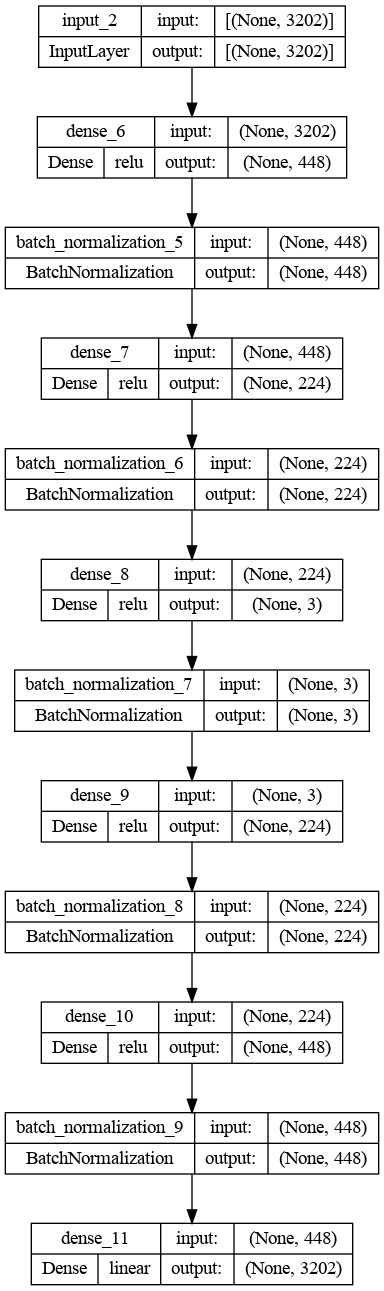

In [4]:
p_model= tf.keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True,to_file='/home/vmh/vmhdocs/Research/Inria/Anl/MotifsDataAutoencoder/Code/model.png')
p_model

# Plot the distance between the true data and the reconstructed version

173


Text(0.5, 1.0, 'Euclidean distance between input and autoencoder output')

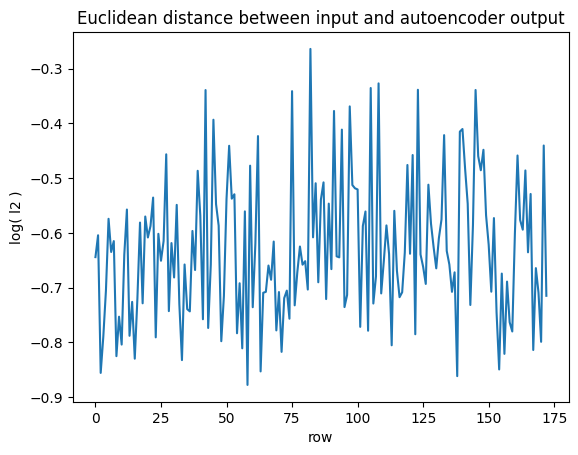

In [5]:
l2_arr = []
inputs = train_data
outputs = model(train_data).numpy()
for i in range(inputs.shape[0]):
    #print(inputs[i])
    #print(outputs[i])
    l2 = np.linalg.norm(outputs[i] - inputs[i])
    l2_arr.append(l2)
print(len(l2_arr))
p = plt.plot(np.log10(l2_arr))
plt.xlabel("row")
plt.ylabel("log( l2 )")
plt.title("Euclidean distance between input and autoencoder output")


    
#plt.savefig("/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/images/r2.png")

# Plot each datum vs its reconstructed version to check how well the autoencoder is doing pointwise

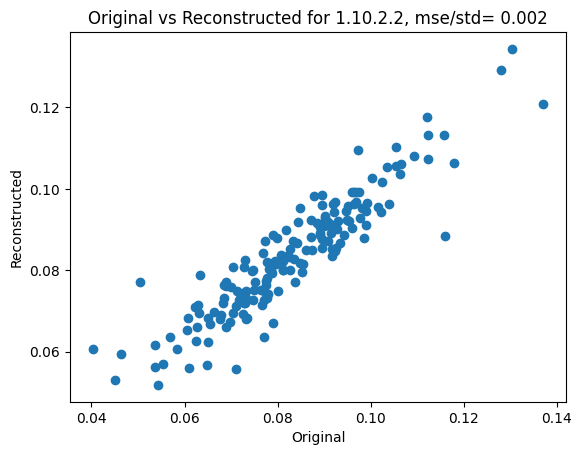

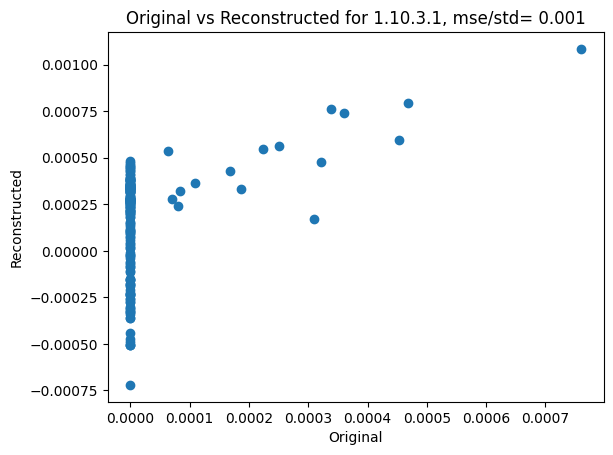

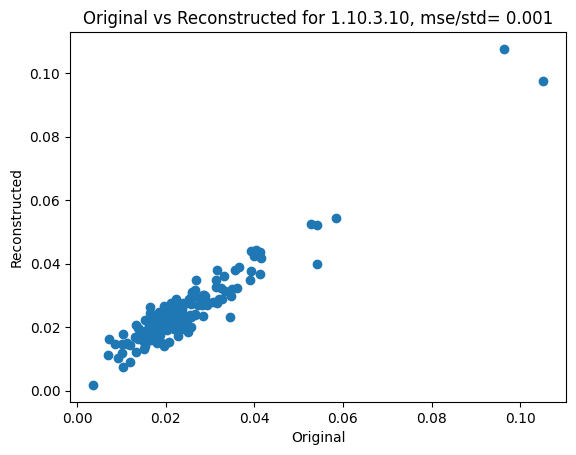

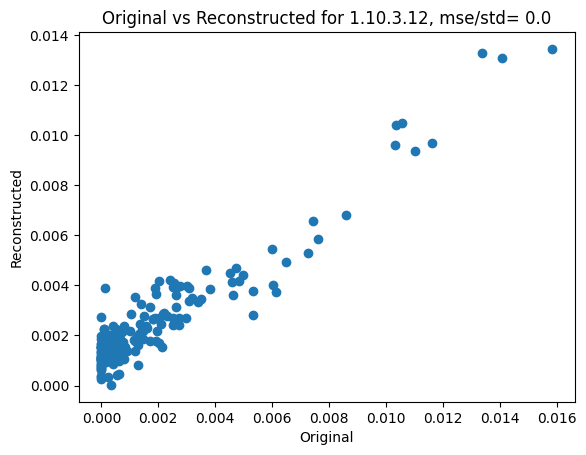

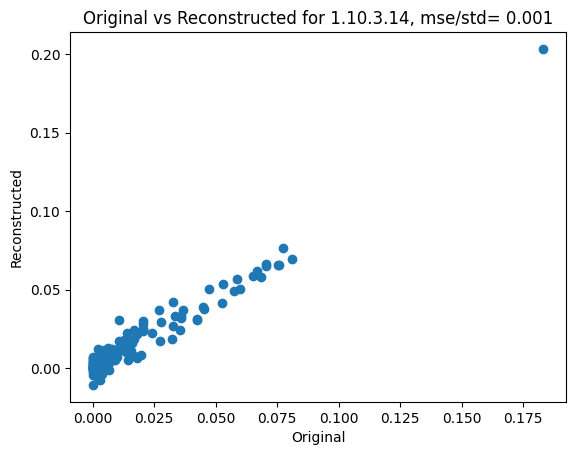

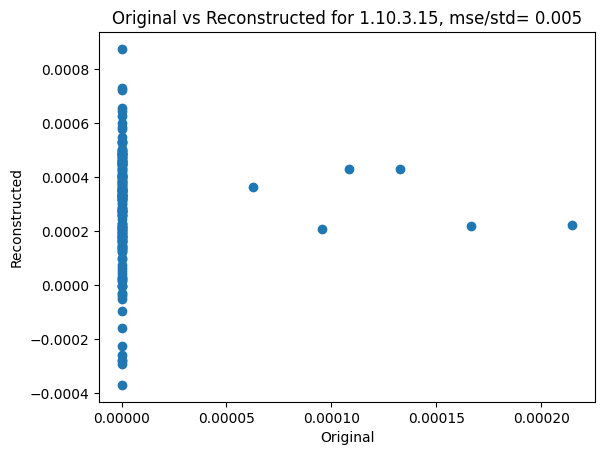

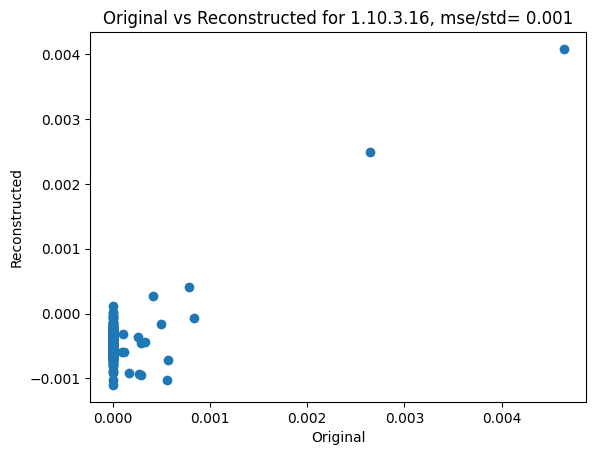

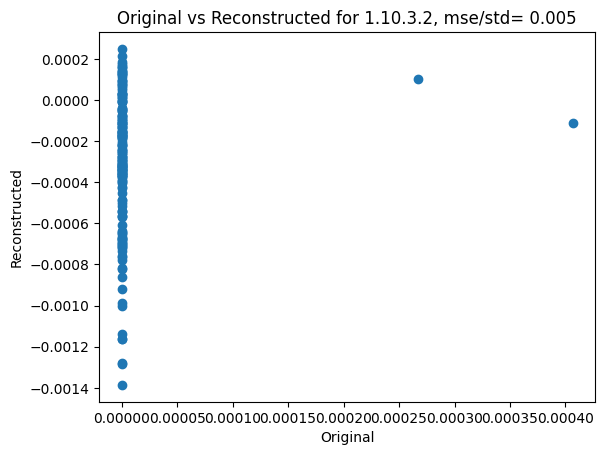

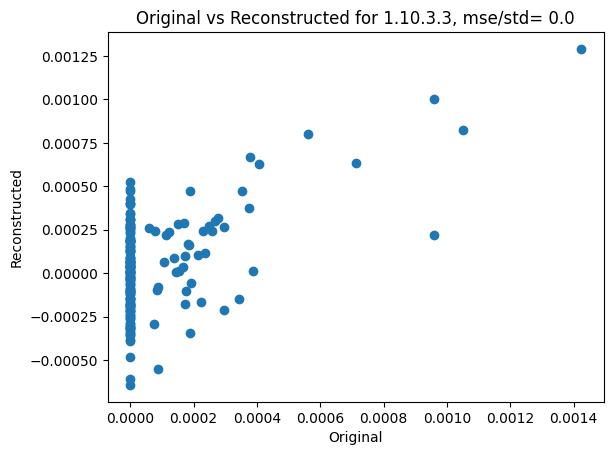

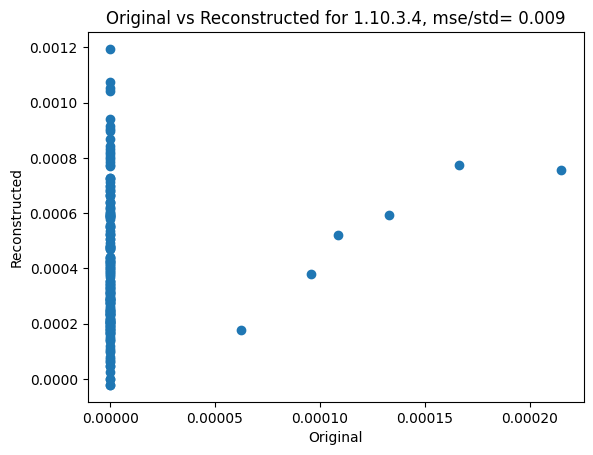

In [9]:
p_arr = []
for j in range(10):
    inp_arr = []
    out_arr = []
    for i in range(inputs.shape[0]):
        inp_arr.append(inputs[i,j])
        out_arr.append(outputs[i,j])
    
    mse = mean_squared_error(out_arr,inp_arr)
    mse_standardized = mse/np.std(inp_arr)
    mse_standardized = round(mse_standardized,3)
    p2 = plt.scatter(inp_arr,out_arr)
    plt.xlabel("Original")
    plt.ylabel("Reconstructed")
    plt.title("Original vs Reconstructed for "+df2.columns[j]+", mse/std= "+str(mse_standardized))
    plt.show()
    


In [7]:
def get_encoderlayers(input):
    inputlayer = model.get_layer(index=0)(input)
    encoderl1 = model.get_layer(index=1)(inputlayer)
    encoderl2 = model.get_layer(index=2)(encoderl1)
    return encoderl1, encoderl2

def get_decoderlayers(input):
    inputlayer = model.get_layer(index=0)(input)
    encoderl1 = model.get_layer(index=1)(inputlayer)
    encoderl2 = model.get_layer(index=2)(encoderl1)
    bottleneck = model.get_layer(index=3)(encoderl2)
    decoderl1 = model.get_layer(index=4)(bottleneck)
    decoderl2 = model.get_layer(index=5)(decoderl1)
    return decoderl1, decoderl2



def get_bottleneck(input):
    bottleneck = model.get_layer(index=0)(input)
    bottleneck = model.get_layer(index=1)(bottleneck)
    bottleneck = model.get_layer(index=2)(bottleneck)
    bottleneck = model.get_layer(index=3)(bottleneck)
    bottleneck = model.get_layer(index=4)(bottleneck)
    bottleneck = model.get_layer(index=5)(bottleneck)
    #print(bottleneck)
    return bottleneck

data = train_data[:1]
data.shape
bottleneck = get_bottleneck(data)
encoder_layers = get_encoderlayers(data)
decoder_layers = get_decoderlayers(data)



# Plot the bottleneck of the autoencoder, colored by catergorical variables.

In [8]:
coded = get_bottleneck(train_data)
coded = pd.DataFrame(coded.numpy(), columns = ['dim1','dim2','dim3'])
for n in df.columns:
    if type(df[n][1])==str:
        print(n)
        print(type(df[n][1]))
        fig = px.scatter_3d(coded, x="dim1", y="dim2",z="dim3",title = "Color coded by "+n ,color = df[n],color_discrete_sequence=px.colors.qualitative.Plotly)
        fig.update_traces(marker_size = 3,opacity=1)
        fig.show()
        fig.write_image("./images/bottleneck_coloredby_"+n+".png")
   


TSC_Names
<class 'str'>


PANGAEA.sample.id
<class 'str'>


Station.label.x
<class 'str'>


Layer.x
<class 'str'>


polar.x
<class 'str'>


Station.label.y
<class 'str'>


Layer.y
<class 'str'>


polar.y
<class 'str'>


Ocean.name
<class 'str'>


Ocean.key
<class 'str'>


Event.date
<class 'str'>
